# Kia's Competitor Report (draft version)
This notebook contains the Data Exploratory Analysis code and the Predictive Model that has been used in our final report (pdf). Except this notebook, also Tableau Software has been used.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
        
pd.set_option('display.max_columns', 500) # show all columns
pd.options.display.max_rows = 200 # show 200 rows
        
import warnings
warnings.filterwarnings("ignore") #remove warning messages during csv import

pd.options.display.float_format = '{:.2f}'.format

#%matplotlib inline

In [2]:
conda install -c conda-forge xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda/envs/Python3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    libxgboost-0.90            |       he1b5a44_4         2.4 MB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    py-xgboost-0.90            |           py36_4          73 KB  conda-forge
    xgboost-0.90               |   py36he1b5a44_4          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following NEW packages will be INST

In [70]:
df = pd.read_csv('/project/raw_data_no_dummies_imputed-2.csv')

In [71]:
df.shape

(31901, 84)

In [72]:
df.columns

Index(['Name', 'MSRP', 'Style Name', 'Drivetrain', 'Passenger Capacity',
       'Passenger Doors', 'Body Style', 'EPA Classification',
       'Base Curb Weight (lbs)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Front Shoulder Room (in)', 'Front Head Room (in)',
       'Second Leg Room (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Height, Overall (in)', 'Fuel Tank Capacity, Approx (gal)',
       'EPA Fuel Economy Est - City (MPG)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'Fuel System', 'First Gear Ratio (:1)', 'Fourth Gear Ratio (:1)',
       'Second Gear Ratio (:1)', 'Reverse Ratio (:1)', 'Trans Type',
       'Third Gear Ratio (:1)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Front Wheel Material',
       'Suspension Type - Front', 'Suspension Type - Rear',
       'Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger',
       'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front',
       'Air 

In [78]:
df['Air Bag-Frontal-Driver'].map({"Yes":1,"No":0})

0        1
1        1
2        1
3        1
4        1
        ..
31896    1
31897    1
31898    1
31899    1
31900    1
Name: Air Bag-Frontal-Driver, Length: 31901, dtype: int64

In [76]:
df["total_airbags"] =  df['Air Bag-Frontal-Driver'] +  df['Air Bag-Frontal-Passenger'] + df['Air Bag-Side Body-Front'] +  df['Air Bag-Side Body-Rear'] + df['Air Bag-Side Head-Front'] + df['Air Bag-Side Head-Rear']

In [79]:
df["total_airbags"] =  df['Air Bag-Frontal-Driver'].map({"Yes":1,"No":0}) +  df['Air Bag-Frontal-Passenger'].map({"Yes":1,"No":0}) + df['Air Bag-Side Body-Front'].map({"Yes":1,"No":0}) +  df['Air Bag-Side Body-Rear'].map({"Yes":1,"No":0}) + df['Air Bag-Side Head-Front'].map({"Yes":1,"No":0}) + df['Air Bag-Side Head-Rear'].map({"Yes":1,"No":0})

In [81]:
df["total_airbags"].value_counts()

5    15723
2     7540
4     3391
3     2421
6     1542
0      775
1      509
Name: total_airbags, dtype: int64

In [85]:
df.loc[df['Company Name']=='Kia'].head(2)

,Name,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Fuel System,First Gear Ratio (:1),Fourth Gear Ratio (:1),Second Gear Ratio (:1),Reverse Ratio (:1),Trans Type,Third Gear Ratio (:1),Steering Type,Turning Diameter - Curb to Curb,Front Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Hybrid/Electric Components Miles/km,Hybrid/Electric Components Years,Curb Weight - Front (lbs),Curb Weight - Rear (lbs),Hybrid/Electric Components Note,Hybrid,Electric,Company Name,Gears,Net Horsepower RPM,Net Torque,Engine Configuration,Rear Tire Width,Front Tire Width,Country,Country Code,Displacement (L),Displacement (cc),Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Net Torque RPM,total_airbags
17774,2018 Kia Sorento Specs: EX V6 AWD,37390.00,EX V6 AWD,All Wheel Drive,7,4,Sport Utility,Compact,4101.00,44.10,58.00,39.30,59.10,39.50,39.40,109.40,74.40,66.50,18.80,19.00,24.00,Gasoline Direct Injection,4.81,1.42,2.90,3.42,8,1.86,Rack-Pinion,37.30,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,60000.00,5.00,100000.00,5.00,100000.00,10.00,60000.00,5.00,"100,000",8,2872.31,3075.00,Applies to hybrid vehicles only,False,False,Kia,8.00,6400.00,252.00,V,235.00,235.00,Korea,3,3.30,204.00,18.00,18.00,1.00,1.00,6.00,2018.00,5200.00,5
17775,2018 Kia Sorento Specs: SX V6 FWD,39990.00,SX V6 FWD,Front Wheel Drive,7,4,Sport Utility,Compact,3968.00,44.10,58.00,39.30,59.10,39.50,39.40,109.40,74.40,66.50,18.80,19.00,26.00,Gasoline Direct Injection,4.81,1.42,2.90,3.42,8,1.86,Rack-Pinion,37.20,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,60000.00,5.00,100000.00,5.00,100000.00,10.00,60000.00,5.00,"100,000",8,2872.31,3075.00,Applies to hybrid vehicles only,False,False,Kia,8.00,6400.00,252.00,V,235.00,235.00,Korea,3,3.30,204.00,19.00,19.00,1.00,1.00,5.00,2018.00,5200.00,5


In [ ]:
df

In [83]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'total_airbags'].value_counts()

5    10
4     8
2     6
Name: total_airbags, dtype: int64

In [53]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Stability Control'].value_counts()

Yes    16
No      8
Name: Stability Control, dtype: int64

In [54]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Fuel System'].value_counts()

Sequential MPI               17
Electronic Fuel Injection     4
Port/Direct Injection         3
Name: Fuel System, dtype: int64

In [55]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Drivetrain'].value_counts()

Front Wheel Drive    11
Four Wheel Drive     10
All Wheel Drive       3
Name: Drivetrain, dtype: int64

In [56]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Suspension Type - Rear'].value_counts()

Multi-link         20
Double Wishbone     3
Multi-Link          1
Name: Suspension Type - Rear, dtype: int64

In [57]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Suspension Type - Front'].value_counts()

MacPherson Strut    20
Strut                4
Name: Suspension Type - Front, dtype: int64

In [58]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Steering Type'].value_counts()

Pwr                  16
Pwr Rack & Pinion     4
Rack-Pinion           4
Name: Steering Type, dtype: int64

In [59]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Parking Aid'].value_counts()

No     18
Yes     6
Name: Parking Aid, dtype: int64

In [60]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Back-Up Camera'].value_counts()

No     16
Yes     8
Name: Back-Up Camera, dtype: int64

In [61]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Engine Configuration'].value_counts()

I    21
V     3
Name: Engine Configuration, dtype: int64

In [62]:
#df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), ''].value_counts()

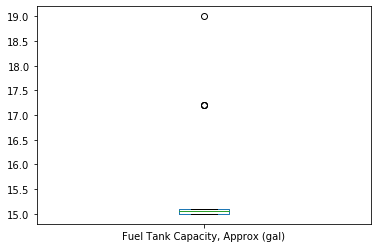

In [64]:
df.loc[(df.Hybrid==1) & (df.MSRP<=41945) & (df['EPA Classification']=='SUV') & ((df['EPA Fuel Economy Est - City (MPG)']>27) ), 'Fuel Tank Capacity, Approx (gal)'].plot(kind='box')

In [65]:
df.loc[df['Company Name']=='KIA']

,Name,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Fuel System,First Gear Ratio (:1),Fourth Gear Ratio (:1),Second Gear Ratio (:1),Reverse Ratio (:1),Trans Type,Third Gear Ratio (:1),Steering Type,Turning Diameter - Curb to Curb,Front Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Hybrid/Electric Components Miles/km,Hybrid/Electric Components Years,Curb Weight - Front (lbs),Curb Weight - Rear (lbs),Hybrid/Electric Components Note,Hybrid,Electric,Company Name,Gears,Net Horsepower RPM,Net Torque,Engine Configuration,Rear Tire Width,Front Tire Width,Country,Country Code,Displacement (L),Displacement (cc),Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Net Torque RPM


In [17]:
# DELETE ALL ROWS WHICH MISSING MSRP
df = df[pd.notnull(df['MSRP'])]
df[df['MSRP'].isnull()]

df.MSRP = df.MSRP.astype(int)

df['EPA Classification'].value_counts()

Compact         9711
Truck           7020
SUV             6356
Midsize         3804
Van             2019
Large           1371
Two Seater      1316
Wagon            233
All Electric      71
Name: EPA Classification, dtype: int64

In [18]:
#df = df.loc[(df.Hybrid==1)&(df['EPA Classification']=='SUV')]
df = df.loc[(df.Year>2005) & (df['EPA Classification']=='Truck')]

In [19]:
columns_drop = ['Style Name', 'Name', 'Hybrid/Electric Components Note', 'Trans Type']
df = df.drop(columns_drop, axis=1)

df.head()

,MSRP,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Fuel System,First Gear Ratio (:1),Fourth Gear Ratio (:1),Second Gear Ratio (:1),Reverse Ratio (:1),Third Gear Ratio (:1),Steering Type,Turning Diameter - Curb to Curb,Front Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Hybrid/Electric Components Miles/km,Hybrid/Electric Components Years,Curb Weight - Front (lbs),Curb Weight - Rear (lbs),Hybrid,Electric,Company Name,Gears,Net Horsepower RPM,Net Torque,Engine Configuration,Rear Tire Width,Front Tire Width,Country,Country Code,Displacement (L),Displacement (cc),Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Net Torque RPM
794,39200,Front Wheel Drive,5,4,4dr Car,Truck,3450.00,41.30,54.50,37.40,55.90,38.90,35.70,111.00,72.50,56.20,15.30,27.00,34.00,Gasoline Direct Injection,3.19,1.06,2.19,2.75,1.52,Rack-Pinion,38.10,Aluminum,Multi-Link,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,50000.00,4.00,10000000.00,12.00,50000.00,4.00,100000.00,4.00,"100,000",8,2872.31,3075.00,False,False,Audi,7.00,4200.00,236.00,I,245.00,245.00,Germany,0,2.00,121.00,18.00,18.00,1.00,1.00,4.00,2018.00,1450.00
1338,33300,Front Wheel Drive,5,4,4dr Car,Truck,3197.00,41.20,53.00,36.10,54.80,36.50,35.10,103.80,70.70,55.70,13.20,26.00,35.00,Gasoline Direct Injection,3.40,0.93,2.75,2.90,1.77,Rack-Pinion,36.10,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,50000.00,4.00,10000000.00,12.00,50000.00,4.00,100000.00,4.00,"100,000",8,2872.31,3075.00,False,False,Audi,5.67,4300.00,221.00,I,245.00,245.00,Germany,0,2.00,121.00,18.00,18.00,1.00,1.00,4.00,2018.00,1600.00
3808,37000,Rear Wheel Drive,6,4,Crew Cab Pickup - Short Bed,Truck,3611.95,44.53,65.16,40.12,66.02,43.03,43.40,147.43,81.24,75.49,24.00,16.00,21.00,Direct Injection,4.03,1.15,2.36,3.06,1.53,Electric Rack & Pinion,46.90,Aluminum,Independent,Solid Axle,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,Yes,36000.00,3.00,100000.00,6.00,60000.00,5.00,60000.00,5.00,"100,000",8,2713.00,1889.00,False,False,Chevrolet,6.00,5300.00,305.00,V,275.00,275.00,USA,6,4.30,262.00,20.00,20.00,1.00,1.00,6.00,2018.00,3900.00
3809,32900,Four Wheel Drive,3,2,Regular Cab Pickup - Long Bed,Truck,3611.95,44.53,57.52,38.28,66.06,43.11,36.18,139.56,81.14,75.63,28.30,15.00,20.00,Direct Injection,4.03,1.15,2.36,3.06,1.53,Electric Rack & Pinion,44.60,Steel,Independent,Solid Axle,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,Yes,36000.00,3.00,100000.00,6.00,60000.00,5.00,60000.00,5.00,"100,000",8,2792.00,1790.00,False,False,Chevrolet,6.00,5300.00,305.00,V,255.00,255.00,USA,6,4.30,262.00,17.00,17.00,1.00,1.00,7.00,2018.00,3900.00
3810,35500,Four Wheel Drive,6,4,Extended Cab Pickup - Standard Bed,Truck,3611.95,44.53,64.88,39.88,66.02,43.03,35.24,147.45,81.24,75.63,24.00,15.00,20.00,Direct Injection,4.03,1.15,2.36,3.06,1.53,Electric Rack & Pinion,46.30,Steel,Independent,Solid Axle,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,Yes,36000.00,3.00,100000.00,6.00,60000.00,5.00,60000.00,5.00,"100,000",8,2863.00,1952

In [20]:
# if we have more than one categories we have to include on specs_to_dumies the 'EPA Classification'
specs_to_dummies = df.select_dtypes('object').columns

#specs_to_dummies = ['Company Name', 'EPA Classification', 'Hybrid', 'Year']
    
for item in specs_to_dummies:
    dummies = pd.get_dummies(df[item], prefix_sep=': ', prefix=item)
    df = pd.concat([df, dummies], sort=False, axis=1)

df = df.drop(specs_to_dummies, axis=1)

In [21]:
df.shape

(5092, 201)

**PREDICTION**

* Select which categories to keep on prediction

In [22]:
#df['EPA Classification'].value_counts()

In [23]:
# EPA CLASSIFICATION DUMMIES

'''# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['EPA Classification'])
# Drop column B as it is now encoded
df = df.drop('EPA Classification',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.head()'''

"# Get one hot encoding of columns B\none_hot = pd.get_dummies(df['EPA Classification'])\n# Drop column B as it is now encoded\ndf = df.drop('EPA Classification',axis = 1)\n# Join the encoded df\ndf = df.join(one_hot)\ndf.head()"

In [24]:
#COMPANY NAME ONE HOT ENCONDING

'''# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['Company Name'])
# Drop column B as it is now encoded
df = df.drop('Company Name',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.head()'''

"# Get one hot encoding of columns B\none_hot = pd.get_dummies(df['Company Name'])\n# Drop column B as it is now encoded\ndf = df.drop('Company Name',axis = 1)\n# Join the encoded df\ndf = df.join(one_hot)\ndf.head()"

* Select cars after a specific year

In [25]:
#df['Year'].value_counts().sort_index(ascending=False)

In [26]:
#here we can select specific time range
'''df = df.loc[df['Year']>2015]
df['Year'].value_counts().sort_index(ascending=False)'''

"df = df.loc[df['Year']>2015]\ndf['Year'].value_counts().sort_index(ascending=False)"

In [27]:
##MODEL FOR HYBRID
'''df = df.loc[df['Hybrid']==1]
df.shape'''

"df = df.loc[df['Hybrid']==1]\ndf.shape"

In [28]:
df.head()

,MSRP,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),First Gear Ratio (:1),Fourth Gear Ratio (:1),Second Gear Ratio (:1),Reverse Ratio (:1),Third Gear Ratio (:1),Turning Diameter - Curb to Curb,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Hybrid/Electric Components Years,Curb Weight - Front (lbs),Curb Weight - Rear (lbs),Hybrid,Electric,Gears,Net Horsepower RPM,Net Torque,Rear Tire Width,Front Tire Width,Country Code,Displacement (L),Displacement (cc),Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Net Torque RPM,Drivetrain: All Wheel Drive,Drivetrain: Four Wheel Drive,Drivetrain: Front Wheel Drive,Drivetrain: Rear Wheel Drive,Body Style: 2dr Car,Body Style: 4dr Car,Body Style: Crew Cab Pickup,Body Style: Crew Cab Pickup - Long Bed,Body Style: Crew Cab Pickup - Short Bed,Body Style: Crew Cab Pickup - Standard Bed,Body Style: Extended Cab Pickup,Body Style: Extended Cab Pickup - Long Bed,Body Style: Extended Cab Pickup - Short Bed,Body Style: Extended Cab Pickup - Standard Bed,Body Style: Full-size Passenger Van,"Body Style: Mini-van, Passenger",Body Style: Regular Cab Chassis-Cab,Body Style: Regular Cab Pickup - Long Bed,Body Style: Regular Cab Pickup - Short Bed,Body Style: Regular Cab Pickup - Standard Bed,Body Style: Sport Utility,Body Style: Station Wagon,EPA Classification: Truck,Fuel System: DI,Fuel System: Diesel Direct Injection,Fuel System: Direct Injection,Fuel System: Electronic Fuel Injection,Fuel System: FFV,Fuel System: Gasoline Direct Injection,Fuel System: MFI,Fuel System: MPFI,Fuel System: PGM-FI,Fuel System: Port/Direct Injection,Fuel System: SElectronic Fuel Injection,Fuel System: SFI,Fuel System: SMFI,Fuel System: Sequential MPI,Fuel System: Turbo-Charged DI,Fuel System: Turbo-Charged OHV,Steering Type: Electric Rack & Pinion,Steering Type: Pwr,Steering Type: Pwr Rack & Pinion,Steering Type: Pwr Rack & pinion,Steering Type: Pwr Recirculating Ball,Steering Type: Pwr rack & pinion w/electric variable assist,Steering Type: Pwr rack & pinion w/hydraulic variable assist,Steering Type: Rack-Pinion,Steering Type: Re-Circulating Ball,Steering Type: Var Pwr Rack & Pinion,Front Wheel Material: Alloy,Front Wheel Material: Aluminum,Front Wheel Material: Forged Aluminum,Front Wheel Material: Steel,Front Wheel Material: Styled Steel,Suspension Type - Front: Coil,Suspension Type - Front: Coil Over Shock,Suspension Type - Front: Coil Spring,Suspension Type - Front: Coil Springs,Suspension Type - Front: Double Wishbone,Suspension Type - Front: Double wishbone,Suspension Type - Front: Double-Wishbone,Suspension Type - Front: Double-wishbone,Suspension Type - Front: Double-wishbone w/stabilizer bar,Suspension Type - Front: Independent,Suspension Type - Front: Independent Coil,Suspension Type - Front: Independent MacPherson Strut,Suspension Type - Front: Independent SLA,Suspension Type - Front: Independent double wishbone,Suspension Type - Front: MacPherson Strut,Suspension Type - Front: MacPherson strut,Suspension Type - Front: Multi-Link,Suspension Type - Front: Other,Suspension Type - Front: Short-Long Arm,Suspension Type - Front: Strut,Suspension Type - Front: Torsion Bar,Suspension Type - Rear: 2-Stage Leaf,Suspension Type - Rear: 2-Stage Multi-Leaf,Suspension Type - Rear: 2-stage multi-leaf,Suspension Type - Rear: 3-Stage,Suspension Type - Rear: Control blade,Suspension Type - Rear: Independent,Suspension Type - Rear: Independent Multi-link,Suspension Type - Rear: Independent SLA,Suspension Type - Rear: Independent multi-link,Suspension Type - Rear: Indpendent,Suspensio

In [29]:
#######################################################################
# REALLY SIMPLISTIC APPROACH TO RUN PREDICTIVE MODELS #################
#######################################################################
df = df.fillna(0)

In [30]:
duplicate_columns = df.columns[df.columns.duplicated()]
duplicate_columns.to_list()

df = df.select_dtypes(exclude=['object'])

df.drop(duplicate_columns.to_list(), axis=1)

df.shape

(5092, 201)

In [31]:
df.head()

,MSRP,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),First Gear Ratio (:1),Fourth Gear Ratio (:1),Second Gear Ratio (:1),Reverse Ratio (:1),Third Gear Ratio (:1),Turning Diameter - Curb to Curb,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Hybrid/Electric Components Years,Curb Weight - Front (lbs),Curb Weight - Rear (lbs),Hybrid,Electric,Gears,Net Horsepower RPM,Net Torque,Rear Tire Width,Front Tire Width,Country Code,Displacement (L),Displacement (cc),Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Net Torque RPM,Drivetrain: All Wheel Drive,Drivetrain: Four Wheel Drive,Drivetrain: Front Wheel Drive,Drivetrain: Rear Wheel Drive,Body Style: 2dr Car,Body Style: 4dr Car,Body Style: Crew Cab Pickup,Body Style: Crew Cab Pickup - Long Bed,Body Style: Crew Cab Pickup - Short Bed,Body Style: Crew Cab Pickup - Standard Bed,Body Style: Extended Cab Pickup,Body Style: Extended Cab Pickup - Long Bed,Body Style: Extended Cab Pickup - Short Bed,Body Style: Extended Cab Pickup - Standard Bed,Body Style: Full-size Passenger Van,"Body Style: Mini-van, Passenger",Body Style: Regular Cab Chassis-Cab,Body Style: Regular Cab Pickup - Long Bed,Body Style: Regular Cab Pickup - Short Bed,Body Style: Regular Cab Pickup - Standard Bed,Body Style: Sport Utility,Body Style: Station Wagon,EPA Classification: Truck,Fuel System: DI,Fuel System: Diesel Direct Injection,Fuel System: Direct Injection,Fuel System: Electronic Fuel Injection,Fuel System: FFV,Fuel System: Gasoline Direct Injection,Fuel System: MFI,Fuel System: MPFI,Fuel System: PGM-FI,Fuel System: Port/Direct Injection,Fuel System: SElectronic Fuel Injection,Fuel System: SFI,Fuel System: SMFI,Fuel System: Sequential MPI,Fuel System: Turbo-Charged DI,Fuel System: Turbo-Charged OHV,Steering Type: Electric Rack & Pinion,Steering Type: Pwr,Steering Type: Pwr Rack & Pinion,Steering Type: Pwr Rack & pinion,Steering Type: Pwr Recirculating Ball,Steering Type: Pwr rack & pinion w/electric variable assist,Steering Type: Pwr rack & pinion w/hydraulic variable assist,Steering Type: Rack-Pinion,Steering Type: Re-Circulating Ball,Steering Type: Var Pwr Rack & Pinion,Front Wheel Material: Alloy,Front Wheel Material: Aluminum,Front Wheel Material: Forged Aluminum,Front Wheel Material: Steel,Front Wheel Material: Styled Steel,Suspension Type - Front: Coil,Suspension Type - Front: Coil Over Shock,Suspension Type - Front: Coil Spring,Suspension Type - Front: Coil Springs,Suspension Type - Front: Double Wishbone,Suspension Type - Front: Double wishbone,Suspension Type - Front: Double-Wishbone,Suspension Type - Front: Double-wishbone,Suspension Type - Front: Double-wishbone w/stabilizer bar,Suspension Type - Front: Independent,Suspension Type - Front: Independent Coil,Suspension Type - Front: Independent MacPherson Strut,Suspension Type - Front: Independent SLA,Suspension Type - Front: Independent double wishbone,Suspension Type - Front: MacPherson Strut,Suspension Type - Front: MacPherson strut,Suspension Type - Front: Multi-Link,Suspension Type - Front: Other,Suspension Type - Front: Short-Long Arm,Suspension Type - Front: Strut,Suspension Type - Front: Torsion Bar,Suspension Type - Rear: 2-Stage Leaf,Suspension Type - Rear: 2-Stage Multi-Leaf,Suspension Type - Rear: 2-stage multi-leaf,Suspension Type - Rear: 3-Stage,Suspension Type - Rear: Control blade,Suspension Type - Rear: Independent,Suspension Type - Rear: Independent Multi-link,Suspension Type - Rear: Independent SLA,Suspension Type - Rear: Independent multi-link,Suspension Type - Rear: Indpendent,Suspensio

In [32]:
duplicate_columns = df.columns[df.columns.duplicated()]
duplicate_columns 

Index([], dtype='object')

**LASSO**

In [33]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [34]:
# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(df.drop('MSRP', axis=1), df['MSRP'], test_size=0.33, random_state=42)

In [35]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 1, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)


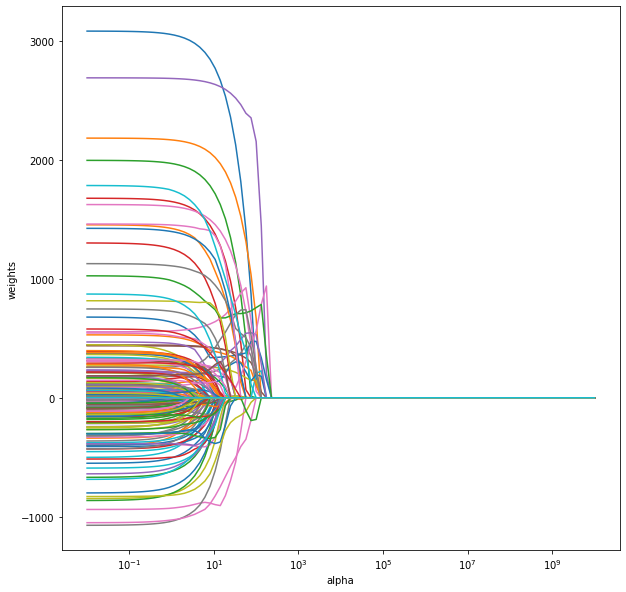

In [36]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')

plt.ylabel('weights');

In [37]:
#CV
from sklearn.metrics import mean_squared_error


lassocv = LassoCV(alphas = alphas , cv = 10, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

np.sqrt(mean_squared_error( y_test, lasso.predict(X_test) ))

3974.849409203146

In [38]:
lasso.predict(X_test)

array([39864.42286579, 35030.44485129, 38287.59963759, ...,
       26500.00955374, 25702.01680849, 18649.8070266 ])

In [39]:
# EXAMPLE OF PREDICTION : Get estimates
for i in [5,10,15]:
    #Left the real, right the predicted
    print(y_test.reset_index().loc[i, 'MSRP'] ,round(lasso.predict(X_test)[i]))

31520 34825.0
43500 43155.0
17485 18902.0


In [40]:
# Some of the coefficients are now reduced to exactly zero.
res = pd.Series(lasso.coef_, index=X_train.columns).to_frame("coeff")
# Selected Features
print("POSITIVE impact Features")
print(res[(res.coeff!=0) & (res.coeff>0) ].count())
print(res[(res.coeff!=0) & (res.coeff>0)  ].sort_values('coeff', ascending=False))

POSITIVE impact Features
coeff    91
dtype: int64
                                                 coeff
Front Wheel Material: Forged Aluminum         15295.37
Suspension Type - Rear: Semi-Trailing Arm      9329.71
Suspension Type - Front: Coil Over Shock       7734.71
Body Style: 2dr Car                            7542.22
Suspension Type - Front: Multi-Link            7270.94
Suspension Type - Rear: Control blade          5816.52
Fuel System: Diesel Direct Injection           5550.49
Body Style: Regular Cab Pickup - Long Bed      5377.56
Suspension Type - Rear: Twist Beam             5146.00
Suspension Type - Rear: SLA Control Blade      4948.66
Body Style: Regular Cab Pickup - Short Bed     4454.30
Suspension Type - Front: Double-Wishbone       4252.62
Company Name: Audi                             4232.16
Body Style: Regular Cab Pickup - Standard Bed  4092.92
Body Style: Regular Cab Chassis-Cab            3965.89
Suspension Type - Rear: Torsion Beam           3783.07
Front Wheel Mat

In [41]:
print("NEGATIVE impact Features")
print(res[(res.coeff!=0) & (res.coeff<0) ].count())
print(res[(res.coeff!=0) & (res.coeff<0) ].sort_values('coeff', ascending=True))

NEGATIVE impact Features
coeff    85
dtype: int64
                                                       coeff
Tire Width Ratio                                   -55222.17
Body Style: Full-size Passenger Van                -12471.98
Hybrid                                             -10020.65
Body Style: Mini-van, Passenger                     -8821.63
Fuel System: PGM-FI                                 -8151.85
Fuel System: MPFI                                   -6594.31
Body Style: Sport Utility                           -5746.41
Suspension Type - Rear: Multi-link                  -4011.87
Suspension Type - Rear: Live Axle                   -3836.93
Steering Type: Pwr rack & pinion w/hydraulic va...  -3783.55
Suspension Type - Rear: Indpendent                  -3764.46
Fuel System: FFV                                    -3411.29
Drivetrain: All Wheel Drive                         -3280.65
Steering Type: Pwr rack & pinion w/electric var...  -3212.50
Suspension Type - Rear: Live rear a

In [42]:
print("Penalised Features")
print(res[(res.coeff==0) ].count())
print(res[(res.coeff==0)])

Penalised Features
coeff    24
dtype: int64
                                                    coeff
Hybrid/Electric Components Years                     0.00
Wheel Size Ratio                                     0.00
Body Style: Crew Cab Pickup                          0.00
EPA Classification: Truck                            0.00
Suspension Type - Front: Double-wishbone w/stab...  -0.00
Suspension Type - Rear: Independent                  0.00
Suspension Type - Rear: Independent multi-link      -0.00
Air Bag-Frontal-Driver: Yes                          0.00
Air Bag-Frontal-Passenger: Yes                       0.00
Air Bag-Side Body-Front: Yes                         0.00
Air Bag-Side Body-Rear: Yes                          0.00
Air Bag-Side Head-Front: Yes                         0.00
Air Bag-Side Head-Rear: Yes                         -0.00
Brakes-ABS: Yes                                     -0.00
Child Safety Rear Door Locks: Yes                   -0.00
Traction Control: Yes       

#XGBOOST

[11:51:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[('Roadside Assistance Years', 1),
 ('Front Shoulder Room (in)', 1),
 ('Drivetrain: Front Wheel Drive', 1),
 ('Steering Type: Pwr', 1),
 ('Fuel System: Diesel Direct Injection', 1),
 ('Displacement (cc)', 1),
 ('Suspension Type - Rear: Multi-link', 1),
 ('Second Gear Ratio (:1)', 1),
 ('Fuel System: Sequential MPI', 1),
 ('Drivetrain Miles/km', 1),
 ('Body Style: Extended Cab Pickup - Standard Bed', 1),
 ('Traction Control: No', 2),
 ('Company Name: Nissan', 2),
 ('Suspension Type - Rear: Solid Axle', 2),
 ('Suspension Type - Rear: 2-stage multi-leaf', 2),
 ('Displacement (L)', 2),
 ('Country Code', 2),
 ('Fuel System: MFI', 2),
 ('Suspension Type - Front: Double-wishbone', 2),
 ('Fuel Tank Capacity, Approx (gal)', 3),
 ('Suspension Type - Front: Independent', 3),
 ('Company Name: Chevrolet', 3),
 ('Third Gear Ratio (:1)', 4),
 ('EPA Fuel Economy Est - Hwy (MPG)', 4),
 ('Body Style: Crew Cab Pickup - Short Bed', 5),
 ('Tire Ratio', 5),
 ('Front Wheel Material: Forged Aluminum', 5),
 ('

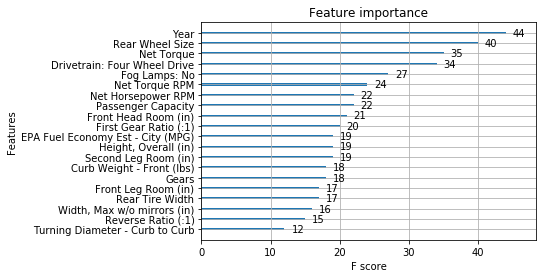

In [43]:
import xgboost as xgb
import operator

xgbc = xgb.XGBRegressor()
model = xgbc.fit(X_train, y_train)

xgb.plot_importance(model, max_num_features=20)

sorted(model.get_booster().get_score(importance_type="weight").items(), key=operator.itemgetter(1))

In [44]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1863.6970449014796

In [45]:
#Get column index
pd.Series(X_test.columns)

0                                     Passenger Capacity
1                                        Passenger Doors
2                                 Base Curb Weight (lbs)
3                                    Front Leg Room (in)
4                              Second Shoulder Room (in)
5                                  Second Head Room (in)
6                               Front Shoulder Room (in)
7                                   Front Head Room (in)
8                                   Second Leg Room (in)
9                                         Wheelbase (in)
10                           Width, Max w/o mirrors (in)
11                                  Height, Overall (in)
12                      Fuel Tank Capacity, Approx (gal)
13                     EPA Fuel Economy Est - City (MPG)
14                      EPA Fuel Economy Est - Hwy (MPG)
15                                 First Gear Ratio (:1)
16                                Fourth Gear Ratio (:1)
17                             

In [46]:
#Get row values
x_values = X_test.loc[X_test.index[0]].values
# Set manually a new value
x_values[1] = 4

In [47]:
X_test.loc[X_test.index[0],:]= x_values

In [48]:
model.predict(X_test)[0]

38263.375